In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import squarify

#### Types of Segmentation factors:

* Demographic (Age, Gender, Income, Location, Education, Ethnicity)
* Psychographic (Interests, Lifestyles, Priorities, Motivation, Influence)
* Behavioural (Purchasing habits, Spending habits, User status, Brand interactions)
* Geographic (zip code, city, country, climate)

#### Loading dataset

In [2]:
# data
sales_df_raw = pd.read_excel('AdventureWorks Sales_raw.xlsx', sheet_name='Sales_data')

date_df_raw = pd.read_excel('AdventureWorks Sales_raw.xlsx', sheet_name='Date_data')

product_df_raw= pd.read_excel('AdventureWorks Sales_raw.xlsx',sheet_name='Product_data')

customer_df_raw = pd.read_excel('AdventureWorks Sales_raw.xlsx', sheet_name='Customer_data')

avoiding using attribute inplace = True according to overwrite data

In [3]:
# keep columns SalesOrderLineKey, OrderDateKey, Order Quantity, Sales Amount, CustomerKey, ProductKey
sales_df = sales_df_raw.drop(columns=['ResellerKey','DueDateKey','ShipDateKey','SalesTerritoryKey','Extended Amount','Unit Price Discount Pct','Product Standard Cost','Total Product Cost'])
sales_df.shape


(121253, 7)

In [4]:
product_df = product_df_raw.drop(columns=['SKU','Color','Standard Cost'])
product_df = product_df[product_df['Category'] == 'Bikes']
product_df.shape

(125, 6)

In [5]:
#keep columns DateKey, Date
date_df = date_df_raw.drop(columns=['Fiscal Year','Fiscal Quarter','Month','Full Date','MonthKey'])
date_df = date_df.rename(columns={'DateKey': 'OrderDateKey'})
date_df

,OrderDateKey,Date
0,20170701,2017-07-01
1,20170702,2017-07-02
2,20170703,2017-07-03
3,20170704,2017-07-04
4,20170705,2017-07-05
...,...,...
1456,20210626,2021-06-26
1457,20210627,2021-06-27
1458,20210628,2021-06-28
1459,20210629,2021-06-29


In [6]:

#delete value -1 of CustomerKey and columns Postal Code and Customer ID
customer_df_raw = customer_df_raw[customer_df_raw['CustomerKey'] != -1]
customer_df_raw = customer_df_raw[customer_df_raw['Country-Region'] == 'United States']
customer_df = customer_df_raw.drop(columns=['Postal Code','Customer ID'])

customer_df.shape

(7819, 5)

#### create the dataframe for RFM model

In [7]:
aw_df = pd.merge(left=sales_df, right=product_df,on='ProductKey')
aw_df = pd.merge(left=aw_df, right=date_df, on='OrderDateKey')
aw_df = pd.merge(left=aw_df, right=customer_df, on='CustomerKey')

aw_df.head()

,SalesOrderLineKey,CustomerKey,ProductKey,OrderDateKey,Order Quantity,Unit Price,Sales Amount,Product,List Price,Model,Subcategory,Category,Date,Customer,City,State-Province,Country-Region
0,43711001,27606,314,20170702,1,3578.27,3578.27,"Road-150 Red, 56",3578.27,Road-150,Road Bikes,Bikes,2017-07-02,Courtney Edwards,Milwaukie,Oregon,United States
1,71134001,27606,563,20200421,1,2384.07,2384.07,"Touring-1000 Yellow, 54",2384.07,Touring-1000,Touring Bikes,Bikes,2020-04-21,Courtney Edwards,Milwaukie,Oregon,United States
2,43706001,27621,312,20170702,1,3578.27,3578.27,"Road-150 Red, 48",3578.27,Road-150,Road Bikes,Bikes,2017-07-02,Edward Brown,Santa Monica,California,United States
3,71203001,27621,561,20200422,1,2384.07,2384.07,"Touring-1000 Yellow, 46",2384.07,Touring-1000,Touring Bikes,Bikes,2020-04-22,Edward Brown,Santa Monica,California,United States
4,43707001,27616,312,20170702,1,3578.27,3578.27,"Road-150 Red, 48",3578.27,Road-150,Road Bikes,Bikes,2017-07-02,Emma Brown,Lemon Grove,California,United States


#### Data Wrangling

In [8]:
#checking datatypes and null values

aw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4907 entries, 0 to 4906
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   SalesOrderLineKey  4907 non-null   int64         
 1   CustomerKey        4907 non-null   int64         
 2   ProductKey         4907 non-null   int64         
 3   OrderDateKey       4907 non-null   int64         
 4   Order Quantity     4907 non-null   int64         
 5   Unit Price         4907 non-null   float64       
 6   Sales Amount       4907 non-null   float64       
 7   Product            4907 non-null   object        
 8   List Price         4907 non-null   float64       
 9   Model              4907 non-null   object        
 10  Subcategory        4907 non-null   object        
 11  Category           4907 non-null   object        
 12  Date               4907 non-null   datetime64[ns]
 13  Customer           4907 non-null   object        
 14  City    

#### Missing values analysis

In [9]:
#checking null values
aw_df.isnull().sum()

SalesOrderLineKey    0
CustomerKey          0
ProductKey           0
OrderDateKey         0
Order Quantity       0
Unit Price           0
Sales Amount         0
Product              0
List Price           0
Model                0
Subcategory          0
Category             0
Date                 0
Customer             0
City                 0
State-Province       0
Country-Region       0
dtype: int64

#### Observation
* Datatype of OrderDate is already datatime 
* There is no null values in dataframe

In [10]:
aw_df = aw_df.dropna()
aw_df.isnull().sum()

SalesOrderLineKey    0
CustomerKey          0
ProductKey           0
OrderDateKey         0
Order Quantity       0
Unit Price           0
Sales Amount         0
Product              0
List Price           0
Model                0
Subcategory          0
Category             0
Date                 0
Customer             0
City                 0
State-Province       0
Country-Region       0
dtype: int64

In [11]:
aw_df=aw_df.drop_duplicates()

In [12]:
aw_df.describe()

,SalesOrderLineKey,CustomerKey,ProductKey,OrderDateKey,Order Quantity,Unit Price,Sales Amount,List Price
count,4.907000e+03,4907.000000,4907.000000,4.907000e+03,4907.0,4907.000000,4907.000000,4907.000000
mean,5.801986e+07,19587.347463,442.640717,2.019074e+07,1.0,1834.085904,1834.085904,1834.085904
std,9.531969e+06,5661.449593,115.412260,9.084428e+03,0.0,973.237075,973.237075,973.237075
min,4.369900e+07,11015.000000,310.000000,2.017070e+07,1.0,539.990000,539.990000,539.990000
25%,4.889350e+07,14438.000000,355.000000,2.018121e+07,1.0,782.990000,782.990000,782.990000
50%,5.805800e+07,18818.000000,376.000000,2.019102e+07,1.0,2071.419600,2071.419600,2071.419600
75%,6.669150e+07,25162.500000,579.000000,2.020022e+07,1.0,2384.070000,2384.070000,2384.070000
max,7.414200e+07,29354.000000,606.000000,2.020053e+07,1.0,3578.270000,3578.270000,3578.270000


# COHORT

In [13]:
cohort = aw_df.copy()
cohort.head()

,SalesOrderLineKey,CustomerKey,ProductKey,OrderDateKey,Order Quantity,Unit Price,Sales Amount,Product,List Price,Model,Subcategory,Category,Date,Customer,City,State-Province,Country-Region
0,43711001,27606,314,20170702,1,3578.27,3578.27,"Road-150 Red, 56",3578.27,Road-150,Road Bikes,Bikes,2017-07-02,Courtney Edwards,Milwaukie,Oregon,United States
1,71134001,27606,563,20200421,1,2384.07,2384.07,"Touring-1000 Yellow, 54",2384.07,Touring-1000,Touring Bikes,Bikes,2020-04-21,Courtney Edwards,Milwaukie,Oregon,United States
2,43706001,27621,312,20170702,1,3578.27,3578.27,"Road-150 Red, 48",3578.27,Road-150,Road Bikes,Bikes,2017-07-02,Edward Brown,Santa Monica,California,United States
3,71203001,27621,561,20200422,1,2384.07,2384.07,"Touring-1000 Yellow, 46",2384.07,Touring-1000,Touring Bikes,Bikes,2020-04-22,Edward Brown,Santa Monica,California,United States
4,43707001,27616,312,20170702,1,3578.27,3578.27,"Road-150 Red, 48",3578.27,Road-150,Road Bikes,Bikes,2017-07-02,Emma Brown,Lemon Grove,California,United States


In [14]:
import datetime as dt

In [15]:
# Define a function that will parse the date
def get_month(x):
    return dt.datetime(x.year,x.month,1) 

# Create InvoiceMonth column
cohort['InvoiceMonth'] = cohort['Date'].apply(get_month) 

# Group by CustomerID and select the InvoiceMonth value
grouping = cohort.groupby('CustomerKey')['InvoiceMonth'] 

# Assign a minimum InvoiceMonth value to the dataset
cohort['CohortMonth'] = grouping.transform('min')

In [16]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

In [17]:
# Get the integers for date parts from the `InvoiceMonth` column
invoice_year, invoice_month = get_date_int(cohort,'InvoiceMonth')

# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(cohort,'CohortMonth')

In [18]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
cohort['CohortIndex'] = years_diff * 12 + months_diff + 1

In [19]:
grouping_customers = cohort.groupby(['CohortMonth', 'CohortIndex'])

In [20]:
# Count the number of unique values per customer ID
cohort_data = grouping_customers['CustomerKey'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerKey')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100

In [21]:
cohort.head()

,SalesOrderLineKey,CustomerKey,ProductKey,OrderDateKey,Order Quantity,Unit Price,Sales Amount,Product,List Price,Model,Subcategory,Category,Date,Customer,City,State-Province,Country-Region,InvoiceMonth,CohortMonth,CohortIndex
0,43711001,27606,314,20170702,1,3578.27,3578.27,"Road-150 Red, 56",3578.27,Road-150,Road Bikes,Bikes,2017-07-02,Courtney Edwards,Milwaukie,Oregon,United States,2017-07-01,2017-07-01,1
1,71134001,27606,563,20200421,1,2384.07,2384.07,"Touring-1000 Yellow, 54",2384.07,Touring-1000,Touring Bikes,Bikes,2020-04-21,Courtney Edwards,Milwaukie,Oregon,United States,2020-04-01,2017-07-01,34
2,43706001,27621,312,20170702,1,3578.27,3578.27,"Road-150 Red, 48",3578.27,Road-150,Road Bikes,Bikes,2017-07-02,Edward Brown,Santa Monica,California,United States,2017-07-01,2017-07-01,1
3,71203001,27621,561,20200422,1,2384.07,2384.07,"Touring-1000 Yellow, 46",2384.07,Touring-1000,Touring Bikes,Bikes,2020-04-22,Edward Brown,Santa Monica,California,United States,2020-04-01,2017-07-01,34
4,43707001,27616,312,20170702,1,3578.27,3578.27,"Road-150 Red, 48",3578.27,Road-150,Road Bikes,Bikes,2017-07-02,Emma Brown,Lemon Grove,California,United States,2017-07-01,2017-07-01,1


In [22]:
# --Calculate Average Price--
grouping_price = cohort.groupby(['CohortMonth', 'CohortIndex'])
cohort_data_price = grouping_price['Unit Price'].mean().reset_index()

average_price = cohort_data_price.pivot(index='CohortMonth', columns='CohortIndex', values='Unit Price')
average_price.round(1)
average_price.index = average_price.index.date


In [23]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping_qty = cohort.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the Quantity column
cohort_data_qty = grouping_qty['Order Quantity'].mean().reset_index()

# Create a pivot 
average_quantity = cohort_data_qty.pivot(index='CohortMonth', columns='CohortIndex', values='Order Quantity')
# average_quantity.round(1)
# average_quantity.index = average_quantity.index.date

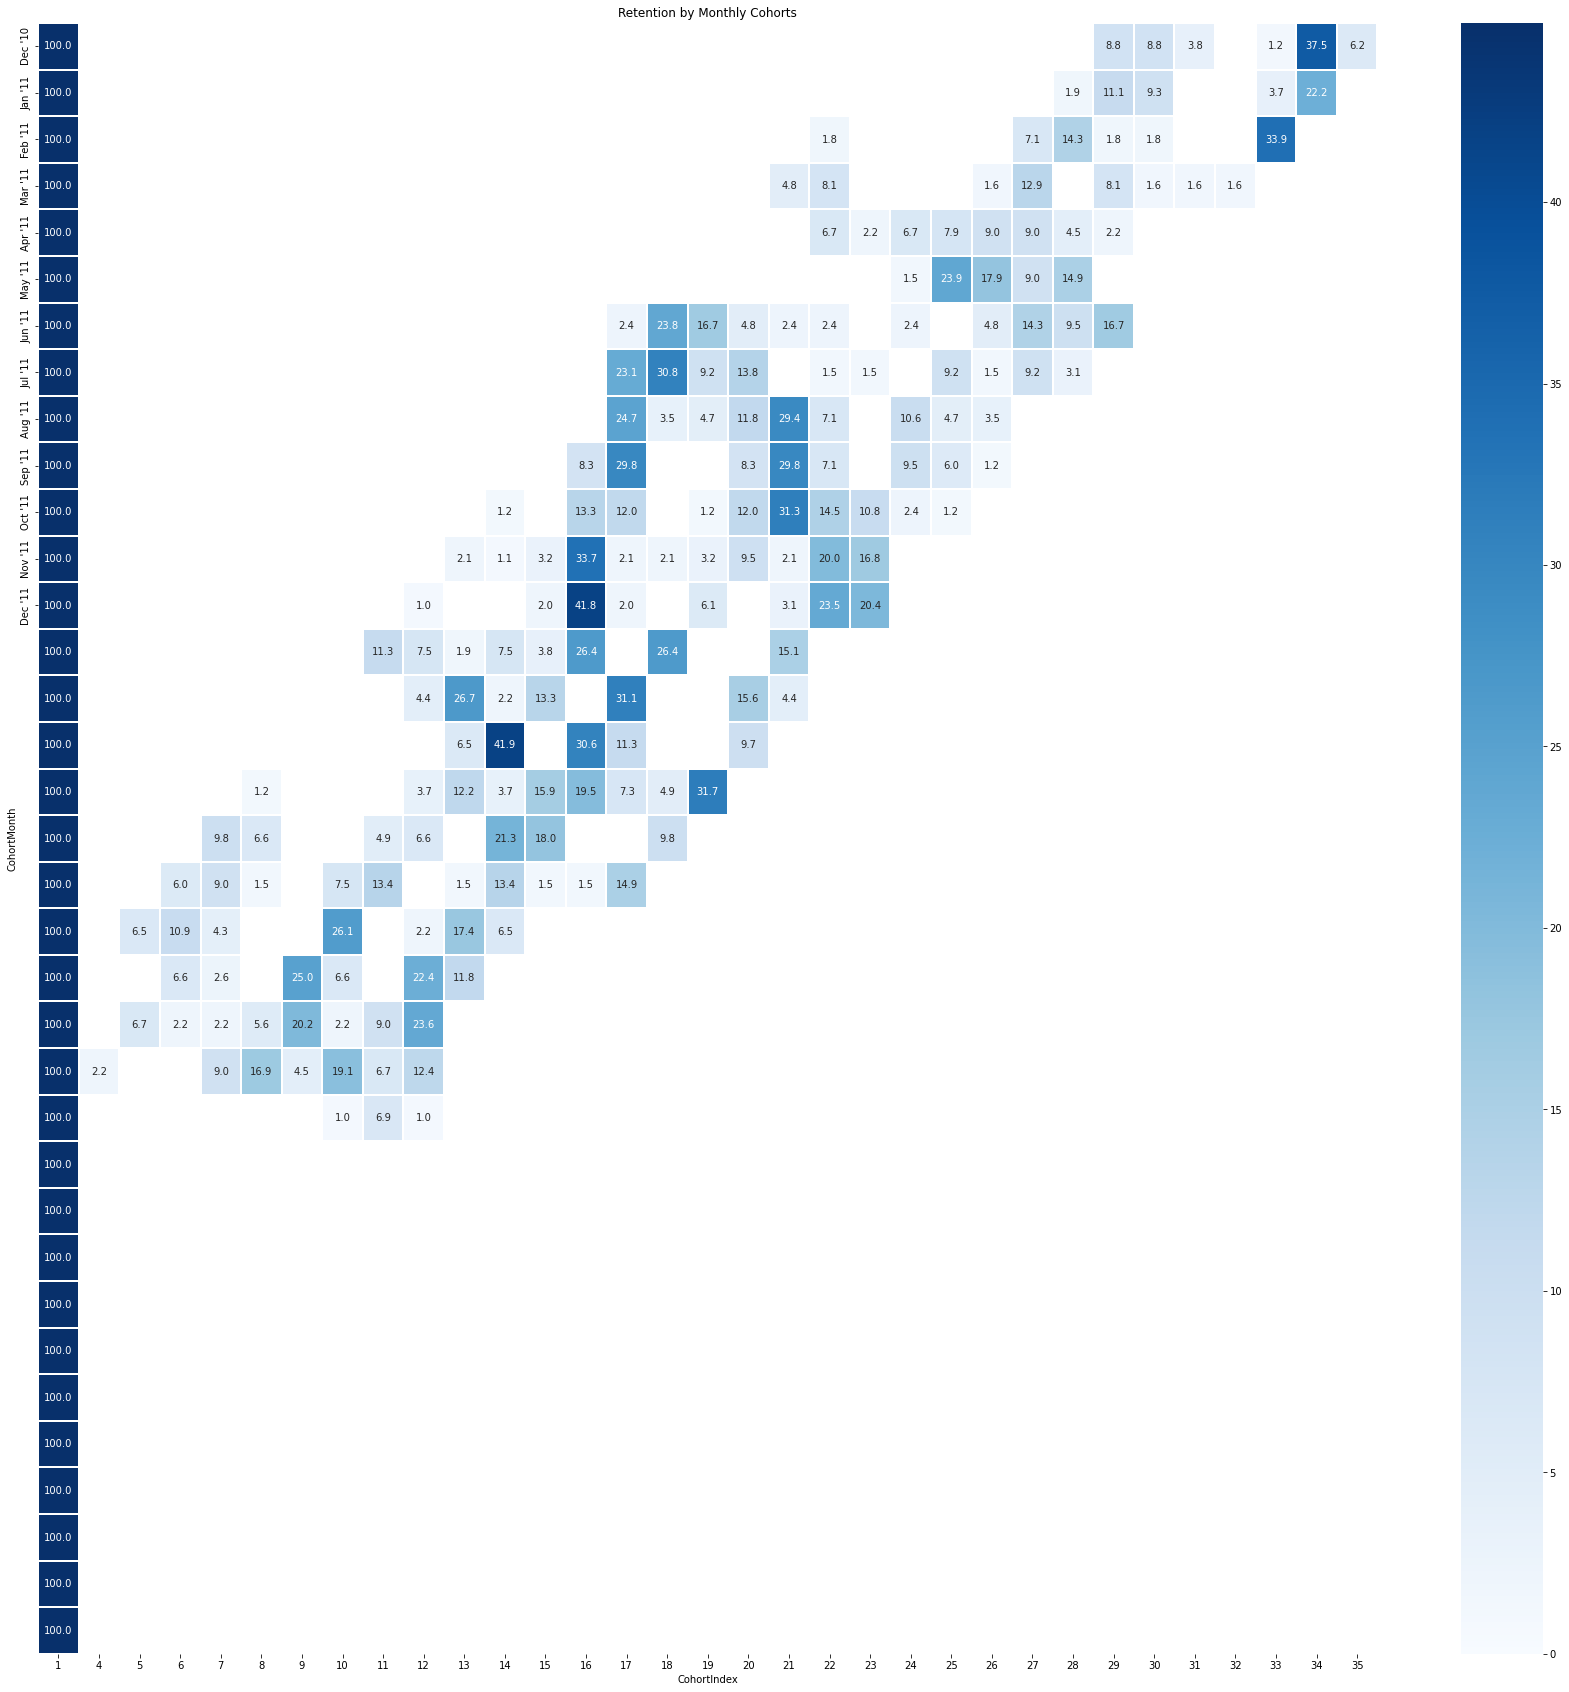

In [24]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

# Initialize inches plot figure
plt.figure(figsize=(30,30))

# Add a title
plt.title('Retention by Monthly Cohorts')

# Create the heatmap
sns.heatmap(data=retention,
            annot = True,
            cmap = "Blues",
            vmin = 0.0,
#             vmax = 0.5,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show()


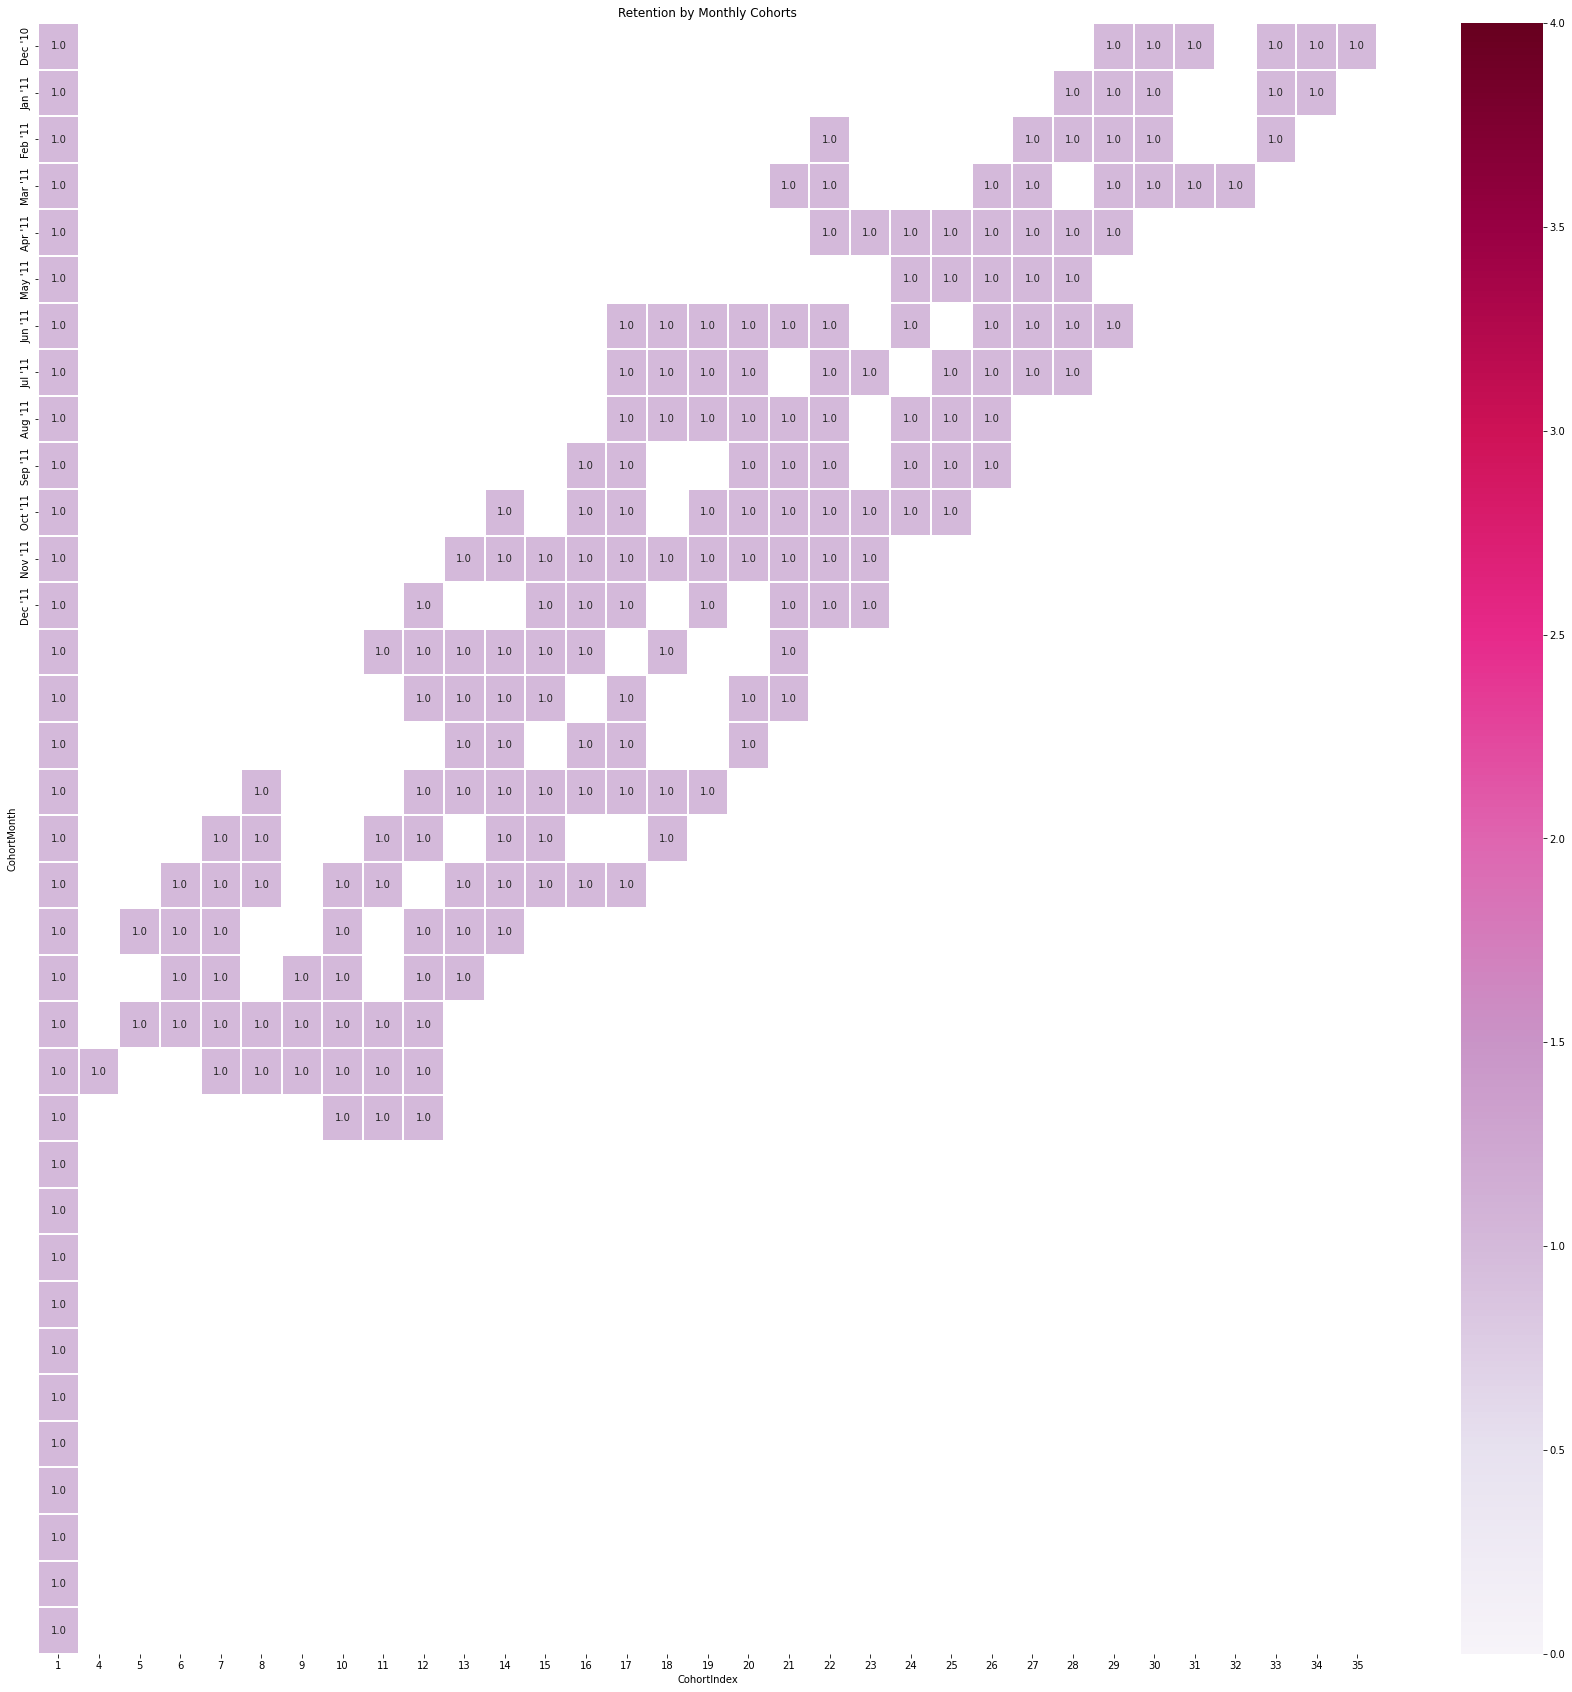

In [25]:
plt.figure(figsize=(30,30))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(data=average_quantity,
            annot = True,
            cmap = "PuRd",
            vmin = 0.0,
#             vmax = 0.5,
            vmax = list(average_quantity.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show()

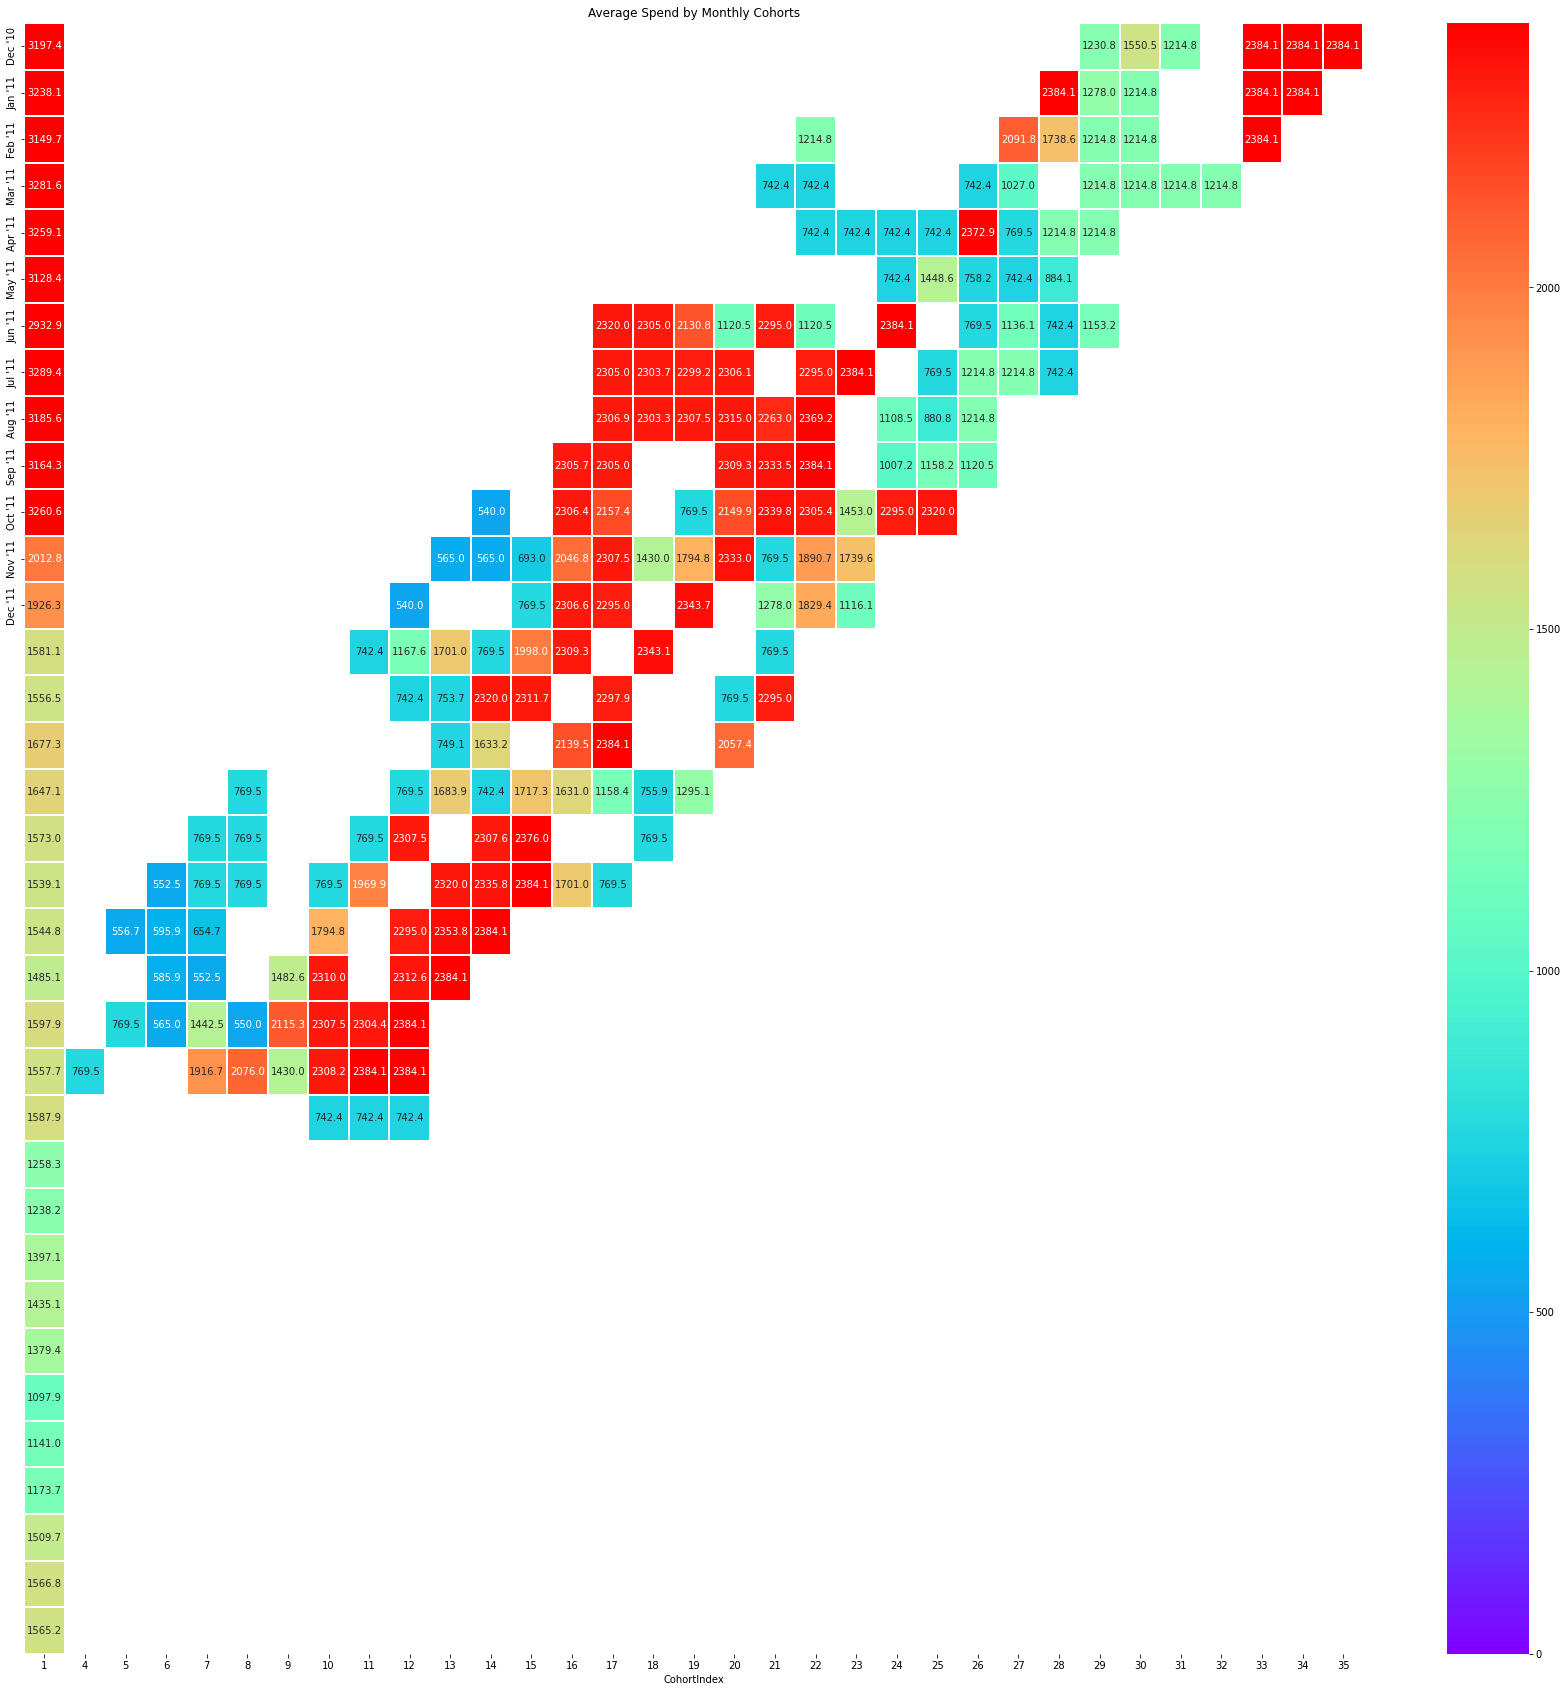

In [26]:
plt.figure(figsize=(30,30))
plt.title('Average Spend by Monthly Cohorts')
sns.heatmap(data=average_price,
            annot = True,
            cmap = "rainbow",
            vmin = 0.0,
#             vmax = 0.5,
            vmax = list(average_price.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show()

#### Calculate average price per cohort
Now we will calculate the average price metric and analyze if there are any differences in shopping patterns across time and across cohorts.

#### RFM analysis

In [27]:
recent_day = aw_df['Date'].max()
recent_day

Timestamp('2020-05-30 00:00:00')

In [28]:
df_rfm = aw_df.groupby(by='CustomerKey', as_index=False).agg(
    {
        'Date': lambda r: (recent_day - r.max()).days,
        'SalesOrderLineKey': lambda f: f.nunique(),
        'Sales Amount': lambda m: m.sum()
    }
)

df_rfm.columns = ['Customer ID','Recency','Frequency','Monetary']
df_rfm

,Customer ID,Recency,Frequency,Monetary
0,11015,344,1,2319.99
1,11016,322,1,2294.99
2,11021,339,1,2294.99
3,11022,342,1,2319.99
4,11036,340,1,2319.99
...,...,...,...,...
3564,29334,867,1,3578.27
3565,29335,866,1,3578.27
3566,29350,866,1,3578.27
3567,29352,873,1,3578.27


In [29]:
df_rfm['Frequency'].value_counts()

1    2241
2    1318
3      10
Name: Frequency, dtype: int64

In [30]:
df_rfm['Recency'].describe()
df_rfm['Frequency'].describe()
df_rfm['Monetary'].describe()


count    3569.000000
mean     2521.675408
std      1665.622903
min       539.990000
25%      1120.490000
50%      2294.990000
75%      3578.270000
max      6640.610000
Name: Monetary, dtype: float64

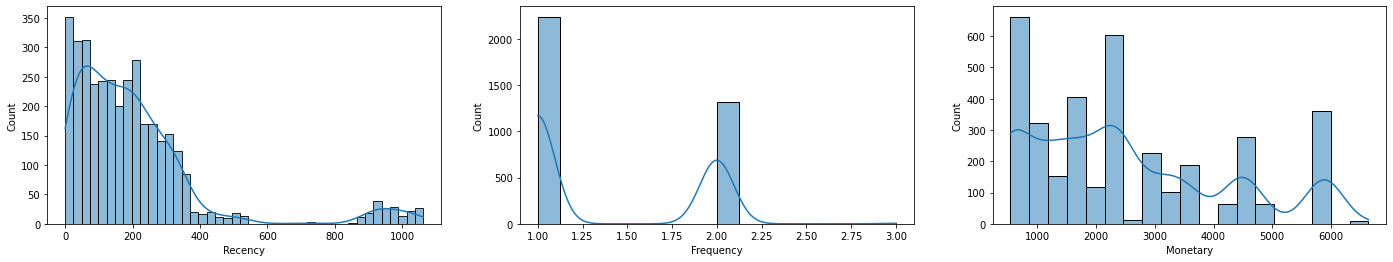

In [31]:
fig, ax = plt.subplots(1, 3, figsize = (24,4))   #tạo một dòng 3 cột
sns.histplot(x=df_rfm['Recency'], ax = ax[0],kde=True)      #vẽ cột đầu tiên
sns.histplot(df_rfm['Frequency'], ax = ax[1],kde=True)
sns.histplot(df_rfm['Monetary'], ax = ax[2],kde=True)

plt.show()

#### rank(method='first)
The “first” method assigns the ranks based on the order they appear. In the case of equality, the first observation in the DataFrame takes the next value, the second one takes the next, and so on

In [32]:

df_rfm['R score'] = pd.qcut(df_rfm['Recency'], 5, labels=[5,4,3,2,1])
df_rfm['F score'] = pd.qcut(df_rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5])
df_rfm['M score'] = pd.qcut(df_rfm['Monetary'], 5, labels=[1,2,3,4,5])

df_rfm['RFM'] = df_rfm['R score'].astype(str) + df_rfm['F score'].astype(str) + df_rfm['M score'].astype(str)

df_rfm


,Customer ID,Recency,Frequency,Monetary,R score,F score,M score,RFM
0,11015,344,1,2319.99,1,1,3,113
1,11016,322,1,2294.99,1,1,3,113
2,11021,339,1,2294.99,1,1,3,113
3,11022,342,1,2319.99,1,1,3,113
4,11036,340,1,2319.99,1,1,3,113
...,...,...,...,...,...,...,...,...
3564,29334,867,1,3578.27,1,4,4,144
3565,29335,866,1,3578.27,1,4,4,144
3566,29350,866,1,3578.27,1,4,4,144
3567,29352,873,1,3578.27,1,4,4,144


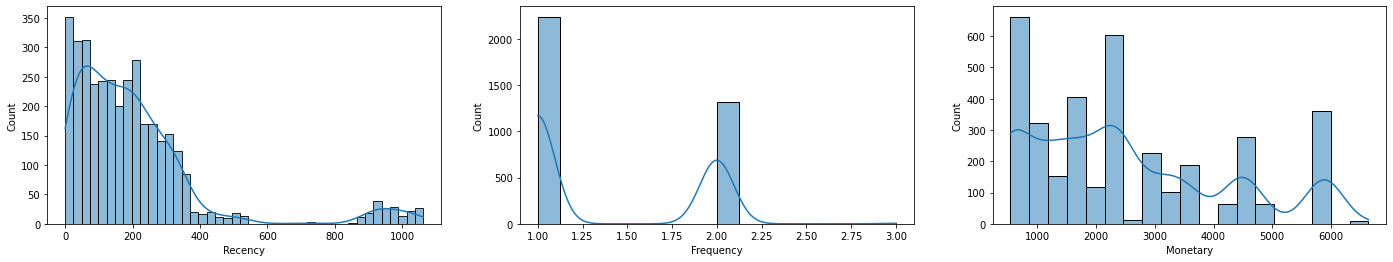

In [33]:
fig, ax = plt.subplots(1, 3, figsize = (24,4))   #tạo một dòng 3 cột
sns.histplot(df_rfm['Recency'], ax = ax[0],kde=True)      #vẽ cột đầu tiên
sns.histplot(df_rfm['Frequency'], ax = ax[1],kde=True)
sns.histplot(df_rfm['Monetary'], ax = ax[2],kde=True)

plt.show()

In [34]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler

In [35]:
rfm_table = df_rfm.drop(columns=['R score','F score','M score','RFM','Customer ID'])
rfm_table.describe()

,Recency,Frequency,Monetary
count,3569.000000,3569.000000,3569.000000
mean,204.569627,1.374895,2521.675408
std,212.433617,0.489918,1665.622903
min,0.000000,1.000000,539.990000
25%,67.000000,1.000000,1120.490000
50%,159.000000,1.000000,2294.990000
75%,260.000000,2.000000,3578.270000
max,1062.000000,3.000000,6640.610000


#### outlier value analysis
* outlier treatment: the algorithm we are going to use is vulnerable to outliers which are very very manipulative
* if you do not exclude outliers, the results will be heavily influenced

Text(0.5, 0, 'Attributes')

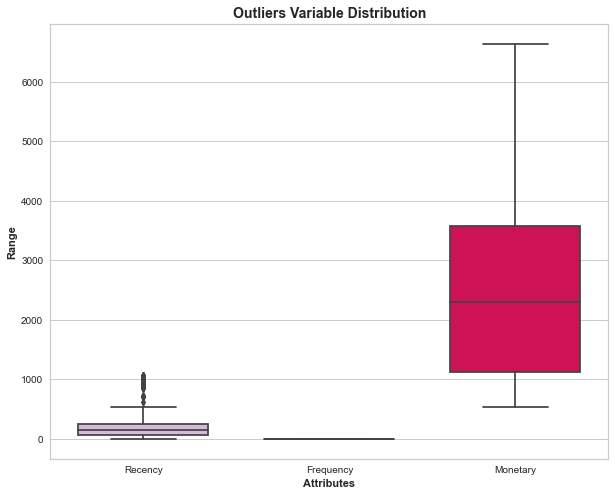

In [36]:
# before outliers treatment

attributes = ['Recency','Frequency','Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm_table[attributes], orient="v", palette="PuRd" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [37]:
def show_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_low = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    outliers_df = df.loc[(df[col] < fence_low) | (df[col] > fence_high)]
    return print('Numbers of outliers in {}'.format(col),len(outliers_df))

In [38]:
for i in ["Recency", "Frequency", "Monetary"]:
    show_outliers(rfm_table, i)
    print("_"*40)

Numbers of outliers in Recency 195
________________________________________
Numbers of outliers in Frequency 0
________________________________________
Numbers of outliers in Monetary 0
________________________________________


In [39]:
#outlier treatment for recency
Q1 = rfm_table.Recency.quantile(0.25)
Q3 = rfm_table.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm_table = rfm_table[(rfm_table.Recency >= (Q1 - 1.5*IQR)) & (rfm_table.Recency <= (Q3 + 1.5*IQR))]
rfm_table.describe()

,Recency,Frequency,Monetary
count,3374.000000,3374.000000,3374.000000
mean,161.015708,1.396562,2462.954954
std,112.872468,0.495279,1693.590966
min,0.000000,1.000000,539.990000
25%,63.000000,1.000000,1120.490000
50%,147.000000,1.000000,2294.990000
75%,238.000000,2.000000,3286.269600
max,539.000000,3.000000,6640.610000


In [40]:
#outlier treatment for frequency
Q1 = rfm_table.Frequency.quantile(0.25)
Q3 = rfm_table.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm_table = rfm_table[(rfm_table.Frequency >= (Q1 - 1.5*IQR)) & (rfm_table.Frequency <= (Q3 + 1.5*IQR))]
rfm_table.describe()

,Recency,Frequency,Monetary
count,3374.000000,3374.000000,3374.000000
mean,161.015708,1.396562,2462.954954
std,112.872468,0.495279,1693.590966
min,0.000000,1.000000,539.990000
25%,63.000000,1.000000,1120.490000
50%,147.000000,1.000000,2294.990000
75%,238.000000,2.000000,3286.269600
max,539.000000,3.000000,6640.610000


In [41]:
#outlier treatment for monetary
Q1 = rfm_table.Monetary.quantile(0.25)
Q3 = rfm_table.Monetary.quantile(0.75)
IQR = Q3 - Q1
rfm_table = rfm_table[(rfm_table.Monetary >= (Q1 - 1.5*IQR)) & (rfm_table.Monetary <= (Q3 + 1.5*IQR))]
rfm_table.describe()

,Recency,Frequency,Monetary
count,3364.000000,3364.000000,3364.000000
mean,161.412604,1.391795,2450.580831
std,112.800178,0.488224,1680.803698
min,0.000000,1.000000,539.990000
25%,63.750000,1.000000,1120.490000
50%,148.000000,1.000000,2294.990000
75%,238.000000,2.000000,3263.948200
max,539.000000,2.000000,5962.340000


Text(0.5, 0, 'Attributes')

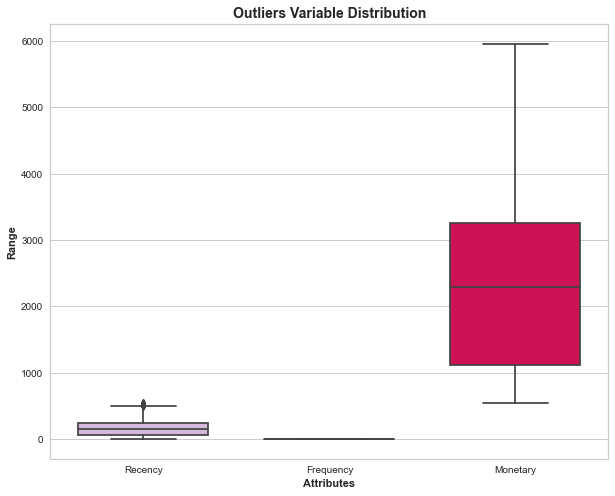

In [42]:
# after outliers treatment

attributes = ['Recency','Frequency','Monetary']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm_table[attributes], orient="v", palette="PuRd" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

# TRANSFORMATION

In [43]:
from scipy.stats import kurtosis, skew, mode, boxcox

In [44]:
rfm_normal = rfm_table.copy()
rfm_normal = rfm_normal[rfm_normal['Recency']>0]

In [45]:
# Transformation process to get the skewness close to 0
# Log transformation
rfm_log = rfm_normal.copy()
rfm_log = np.log(rfm_log[['Recency','Frequency','Monetary']])
# Square root transformation
rfm_sqrt = rfm_normal.copy()
rfm_sqrt = np.sqrt(rfm_sqrt[['Recency','Frequency','Monetary']])
# Cube root transformation
rfm_cbrt = rfm_normal.copy()
rfm_cbrt = np.cbrt(rfm_cbrt[['Recency','Frequency','Monetary']])
# Box cox transformation
rfm_boxcox = rfm_normal.copy()

#boxcox require 1-dimension data
rfm_boxcox['Recency'] = boxcox(rfm_boxcox['Recency'])[0]
rfm_boxcox['Frequency'] = boxcox(rfm_boxcox['Frequency'])[0]
rfm_boxcox['Monetary'] = boxcox(rfm_boxcox['Monetary'])[0]

# SKEWNESS
* The skewness value greater than 1 or less than -1 indicates a highly skewed distribution.
* The value between 0.5 and 1 or -0.5 and -1 is moderately skewed.
* The value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [46]:
# def analyze_skewness(x):
#     fig, ax = plt.subplots(2, 2, figsize=(5,5))
#     sns.histplot(rfm_normal[x], ax=ax[0,0])
#     sns.histplot(np.log(rfm_normal[x]), ax=ax[0,1])
#     sns.histplot(np.sqrt(rfm_normal[x]), ax=ax[1,0])
#     sns.histplot(boxcox(rfm_normal[x])[0], ax=ax[1,1])
#     plt.tight_layout()
#     plt.show()
    
#     print("original skew: ",rfm_normal[x].skew().round(2))
#     print("log transform: {}".format(np.log(rfm_normal[x]).skew().round(2)))
#     print("sqrt transform: {}".format(np.sqrt(rfm_normal[x]).skew().round(2)))
#     print("boxcox transform: {}".format(pd.Series(boxcox(rfm_normal[x])[0]).skew().round(2)))

In [47]:
# analyze_skewness('Recency')

In [48]:
# analyze_skewness('Frequency')

In [49]:
# analyze_skewness('Monetary')

In [50]:
def check_skew(df):
    fig, ax = plt.subplots(1, 3, figsize = (24,4))
    for col, i in zip(['Recency','Frequency','Monetary'], range (3)):
        skewness = skew(df[col])
        plt.title('Distribution of ' + col)
        sns.histplot(df[col],ax=ax[i],kde=True)
        print("{}'s skew: {}".format(col, skewness))
    plt.show()
    return

Recency's skew: -0.16537521572778774
Frequency's skew: 0.4428746347683837
Monetary's skew: -0.05318253930825124


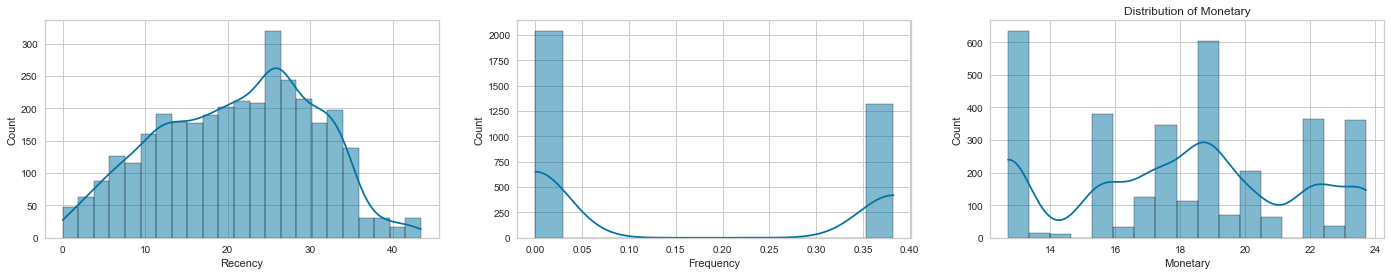

In [51]:
# Box cox transformation
check_skew(rfm_boxcox)

Recency's skew: -0.15633697315040593
Frequency's skew: 0.4428746347683836
Monetary's skew: 0.2824876425159896


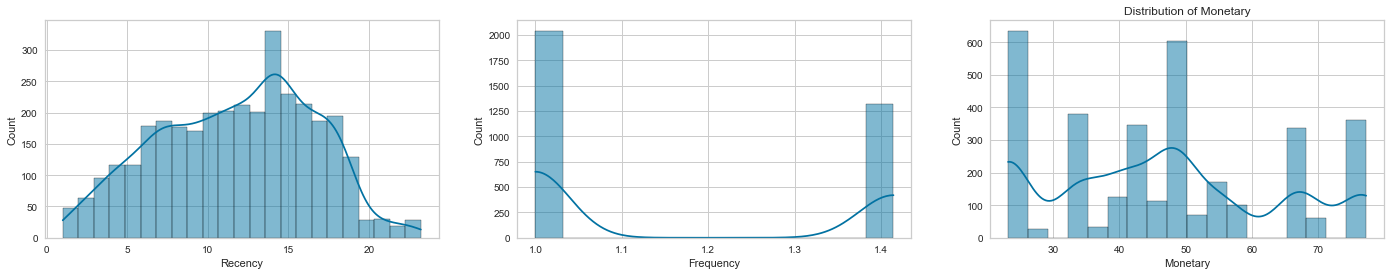

In [52]:
# Square root transformation
check_skew(rfm_sqrt)

Recency's skew: -1.4091124889840414
Frequency's skew: 0.4428746347683832
Monetary's skew: -0.28101147336701243


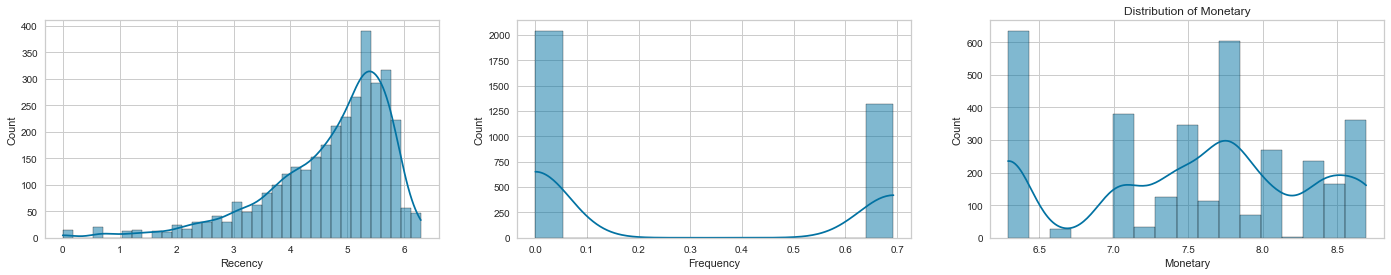

In [53]:
# Log transformation
check_skew(rfm_log)

Recency's skew: -0.476969743817404
Frequency's skew: 0.44287463476838823
Monetary's skew: 0.09606427023155872


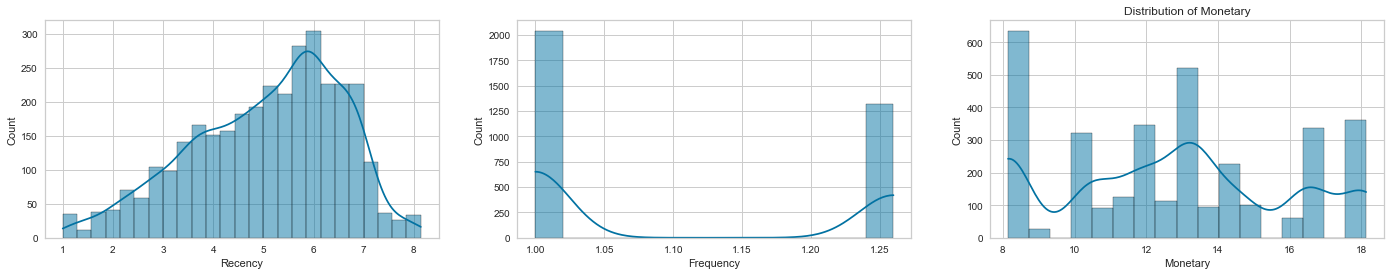

In [54]:
# Cube root transformation
check_skew(rfm_cbrt)

#### scaling the RFM data

In [55]:
standard_scaler = StandardScaler()
rfm_scaled = rfm_boxcox[['Recency', 'Frequency', 'Monetary']].values
rfm_scaled = standard_scaler.fit_transform(rfm_boxcox)
rfm_scaled = pd.DataFrame(rfm_scaled)
rfm_scaled.columns = ['Recency','Frequency','Monetary']

rfm_scaled.head()

,Recency,Frequency,Monetary
0,1.404989,-0.802787,0.205194
1,1.280467,-0.802787,0.190401
2,1.377050,-0.802787,0.190401
3,1.393839,-0.802787,0.205194
4,1.382655,-0.802787,0.205194


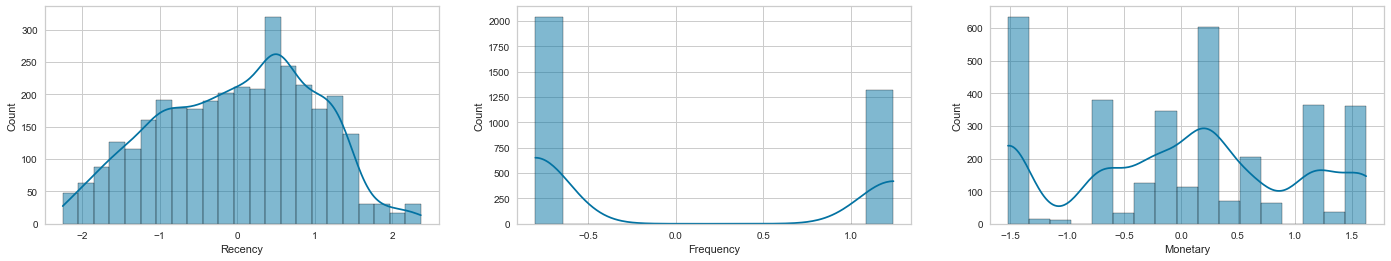

In [56]:
fig, ax = plt.subplots(1,3,figsize=(24,4))
sns.histplot(x=rfm_scaled['Recency'], ax = ax[0],kde=True)      
sns.histplot(x=rfm_scaled['Frequency'], ax = ax[1],kde=True)
sns.histplot(x=rfm_scaled['Monetary'], ax = ax[2],kde=True)

plt.show()

# KMEANS

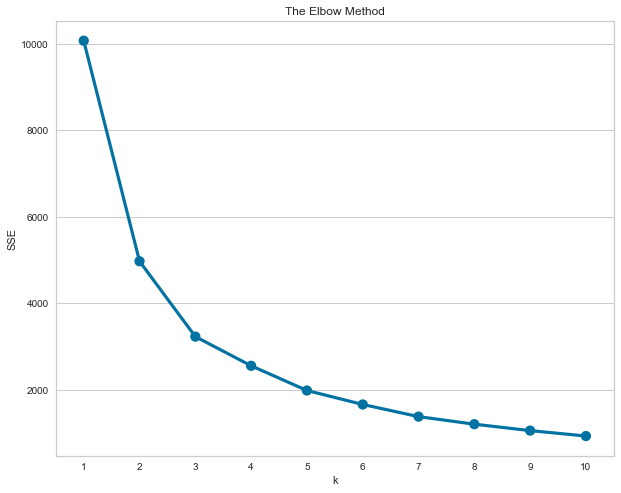

In [57]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(rfm_scaled)
    sse[k] = kmeans.inertia_ 
    
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [58]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

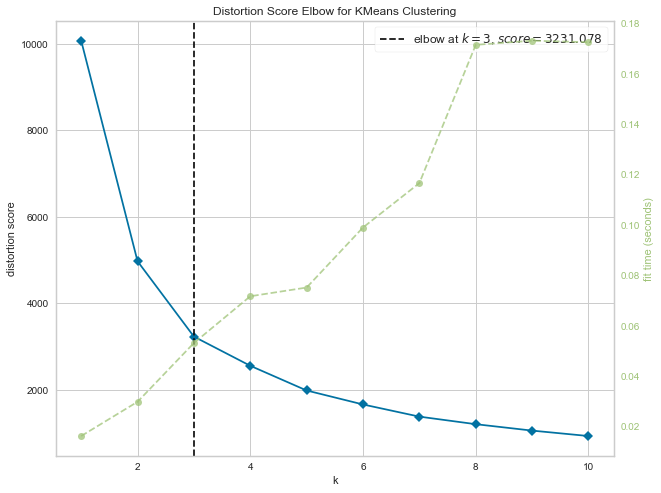

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
elbow = KElbowVisualizer(kmeans, k=(1,11))
elbow.fit(rfm_scaled)
elbow.show()

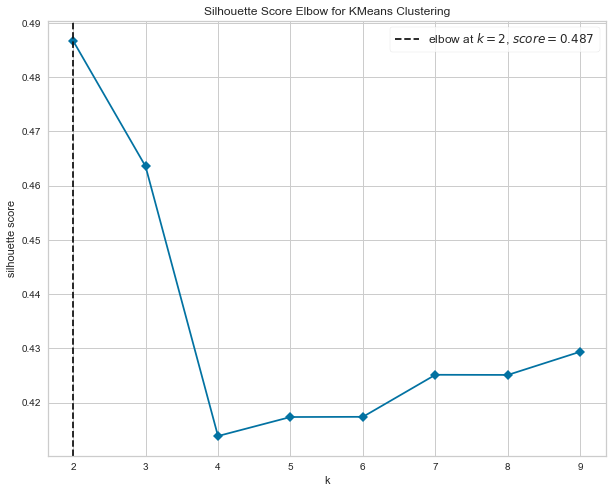

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [60]:
Elbow_M = KElbowVisualizer(KMeans(), k=(2,10),metric='silhouette', timings=False)
Elbow_M.fit(rfm_scaled)
Elbow_M.show()

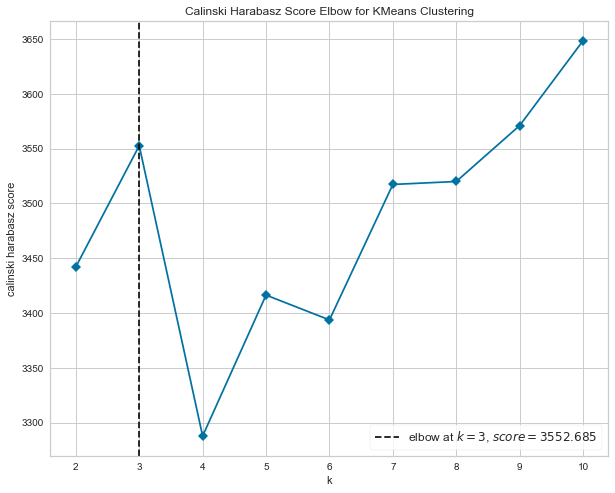

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [61]:
calinski_harabasz = KElbowVisualizer(KMeans(), k=10, metric='calinski_harabasz', timings=False)
calinski_harabasz.fit(rfm_scaled)
calinski_harabasz.show()

# silhouette_score

In [62]:
from sklearn.metrics import silhouette_score

In [63]:
#Silhouette Score
range_n_clusters = [2,3,4,5,6,7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,random_state=1)
    preds = clusterer.fit_predict(rfm_scaled)
    centers = clusterer.cluster_centers_

    score = silhouette_score(rfm_scaled, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4867286729587733
For n_clusters = 3, silhouette score is 0.46356763761532294
For n_clusters = 4, silhouette score is 0.4137480102820054
For n_clusters = 5, silhouette score is 0.41732147904808153
For n_clusters = 6, silhouette score is 0.41738407359963653
For n_clusters = 7, silhouette score is 0.4257292063682866
For n_clusters = 8, silhouette score is 0.42450279623631343
For n_clusters = 9, silhouette score is 0.43021596774515414
For n_clusters = 10, silhouette score is 0.43315250246340753


In [64]:
wcss_silhouette = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(rfm_scaled)
    preds = km.predict(rfm_scaled)    
    silhouette = silhouette_score(rfm_scaled,preds)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

Silhouette score for number of cluster(s) 2: 0.4867286729587733
Silhouette score for number of cluster(s) 3: 0.46356763761532294
Silhouette score for number of cluster(s) 4: 0.4138423361212042
Silhouette score for number of cluster(s) 5: 0.4173483895492349
Silhouette score for number of cluster(s) 6: 0.4174675172285251
Silhouette score for number of cluster(s) 7: 0.42513488701693364
Silhouette score for number of cluster(s) 8: 0.4251431624421385
Silhouette score for number of cluster(s) 9: 0.43040122962417476
Silhouette score for number of cluster(s) 10: 0.43374551078511725
Silhouette score for number of cluster(s) 11: 0.4281564965035588


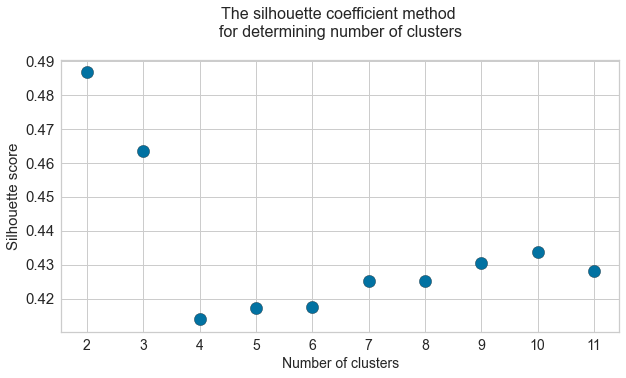

In [65]:
plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Here we can clearly see that optimum number of cluster should be 4 not 2 or 3. Because that is the only point after which the mean cluster distance looks to be plateaued after a steep downfall. So we will assume the 4 number of clusters as best for grouping of customer segments.

Now let's apply K-Means on 4 clusters to segregate the customer base.

In [66]:
model = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
model.fit(rfm_scaled)

KMeans(n_clusters=3, random_state=0)

C:\Users\defaultuser0.LAPTOP-POTNR7PE\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


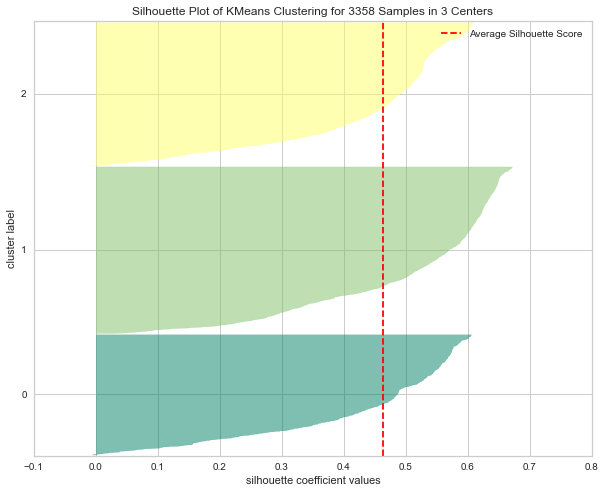

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3358 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [67]:
visualizer = SilhouetteVisualizer(model, colors='summer')

visualizer.fit(rfm_scaled)        # Fit the data to the visualizer
visualizer.show()  

In [68]:
rfm_scaled['Cluster'] = model.labels_
rfm_scaled.head()

,Recency,Frequency,Monetary,Cluster
0,1.404989,-0.802787,0.205194,2
1,1.280467,-0.802787,0.190401,2
2,1.377050,-0.802787,0.190401,2
3,1.393839,-0.802787,0.205194,2
4,1.382655,-0.802787,0.205194,2


In [69]:
rfm_scaled.groupby('Cluster').agg(
    {
        'Recency':'mean',
        'Frequency':'mean',
        'Monetary':'mean'
    }
).round(2).T

Cluster,0,1,2
Recency,-1.04,0.05,0.82
Frequency,-0.77,1.25,-0.80
Monetary,-0.52,0.91,-0.62


In [70]:
rfm_scaled['Cluster'].value_counts()

1    1302
2    1116
0     940
Name: Cluster, dtype: int64

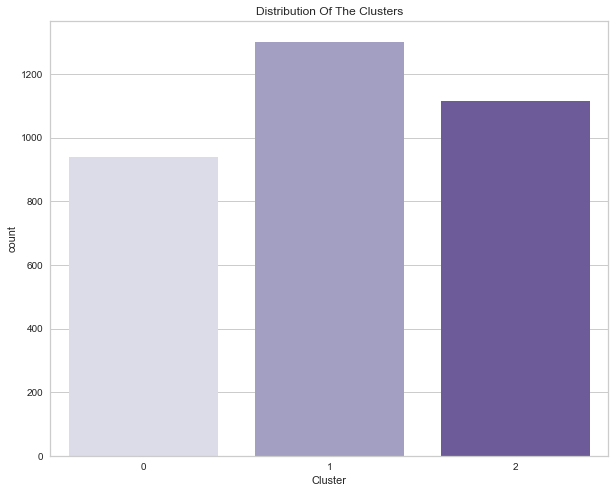

In [71]:
pl = sns.countplot(x=rfm_scaled['Cluster'], palette= 'Purples')
pl.set_title("Distribution Of The Clusters")
plt.show()

<AxesSubplot:xlabel='Frequency', ylabel='Monetary'>

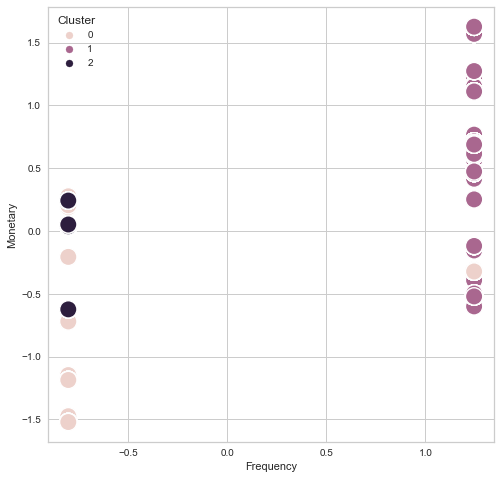

In [72]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = rfm_scaled, x='Frequency', y='Monetary', hue='Cluster', s=300)

In [73]:
X = rfm_scaled[['Recency' , 'Frequency' ,'Monetary']].iloc[: , :].values

labels = model.labels_
centroids = model.cluster_centers_

In [74]:
import plotly as py
import plotly.graph_objs as go

In [75]:
trace = go.Scatter3d(
    x= rfm_scaled['Recency'],
    y= rfm_scaled['Frequency'],
    z= rfm_scaled['Monetary'],
    mode='markers',
    marker=dict(
        color = labels, 
        # colorscale = 'peach',
        size= 20,
        # line=dict(
        #     color= labels,
        #     # colorscale = 'peach',
        #     width= 12
        # ),
        opacity=0.8
     )
)
data = [trace]
layout = go.Layout(
    margin=dict(l=0,r=0),
    height = 700,width = 700,
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Recency'),
            yaxis = dict(title  = 'Frequency'),
            zaxis = dict(title  = 'Monetary')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

Heat Map
We will utilize heat map to visualize the relative importance of each attributes in all four customer segments i.e. clusters. It calculates importance score by dividing them and subtracting 1 (ensures 0 is returned when cluster average equals population average).

The farther a ratio is from 0, the more important that attribute is for a segment relative to the total population.

<AxesSubplot:>

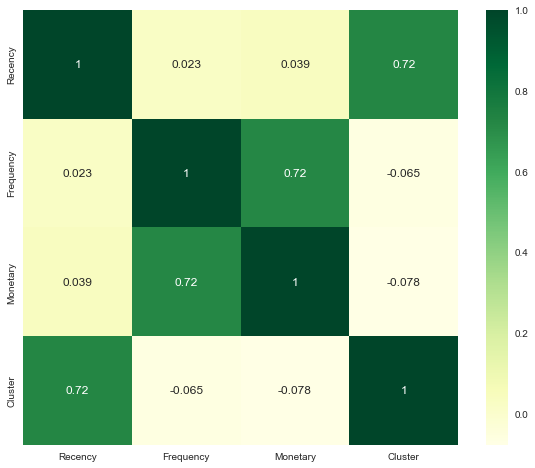

In [76]:

fig, axis = plt.subplots(figsize=(10, 8))
corr = rfm_scaled.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = bool), cmap = 'YlGn',
            square = True, ax = axis, annot=True)

In [77]:
# Average attributes for each cluster
cluster_avg = rfm_scaled.groupby(['Cluster']).mean() 

# Calculate the population average
population_avg = rfm_table.mean()

# Calculate relative importance of attributes by 
relative_imp = cluster_avg / population_avg - 1

sẽ dùng này để nhận xét các đặc điểm của khách hàng trong từng cụm : D nhma chả hiểu mẹ gì

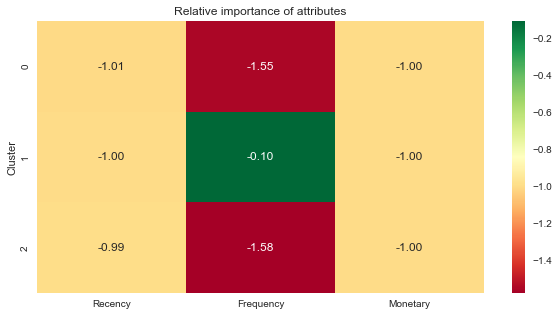

In [78]:
plt.figure(figsize=(10, 5))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()

In [79]:
# Function to visualize clusters
def rfm_clusters_stat(df):
    df_new = df.groupby(['Cluster']).agg({
            'Recency'  : ['mean','median', 'min', 'max'],
            'Frequency': ['mean','median', 'min', 'max'],
            'Monetary' : ['mean','median', 'min', 'max', 'count']
        }).round(0)

    return df_new

In [80]:

rfm_clusters_stat(rfm_scaled).style.background_gradient(cmap='PuRd')

In [81]:
RFM_stats= pd.DataFrame(rfm_clusters_stat(rfm_scaled))

Text(0.5, 0.98, 'Segments of Customers')

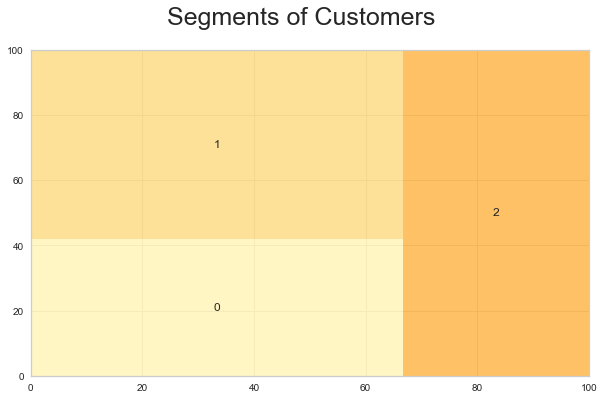

In [82]:

# Visualize Segments
plt.figure(figsize=(10, 6))
squarify.plot(sizes=RFM_stats["Monetary"]["count"], label=RFM_stats.index, color=sns.color_palette("YlOrBr"), alpha=0.8)
plt.suptitle("Segments of Customers", fontsize=25)

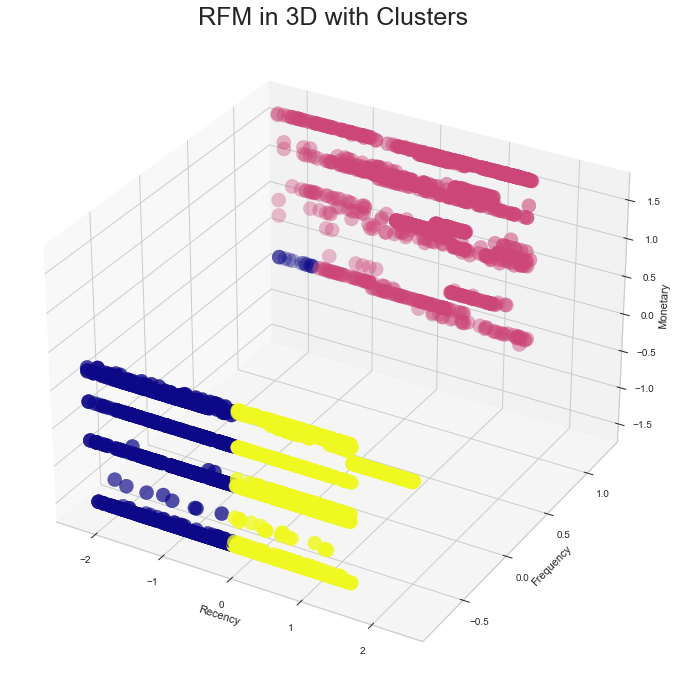

In [83]:
# Creating figure
fig = plt.figure(figsize = (12, 12))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(rfm_scaled.Recency, rfm_scaled.Frequency, rfm_scaled.Monetary, c=rfm_scaled.Cluster, cmap='plasma',s=200)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('RFM in 3D with Clusters', size=25)
ax.set(facecolor='white')
plt.show()